In [148]:
#Seattle Airbnb Open Data
#import the required library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
import locale


listings = pd.read_csv('listings.csv')
listings.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
#the size of the data frame 
listings.shape

(3818, 92)

In [121]:
#check for any empty columns or columns that can be dropped
listings.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [149]:
# transform all money information so we can work with in the analysis 
locale.setlocale(locale.LC_ALL,'')
listings['price']=listings.price.map(lambda x: locale.atof(x.strip('$')))


In [102]:
#understand the data more 
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [131]:
# all yhe below Url not usefull to my analysis and the license column is completely empty so i will drop them 
listings=listings.drop(['thumbnail_url','medium_url', 'picture_url' , 'xl_picture_url' , 'license'],axis=1)

In [266]:
#what is the types of avaliable properties in Seattle Airbnb
room_type= listings.groupby('room_type').size().to_frame(name = 'count').reset_index() 
room_type.head()


,room_type,count
0,Entire home/apt,2125
1,Private room,954
2,Shared room,92


Text(0.5, 1.0, 'Different room types percentage in Seattle')

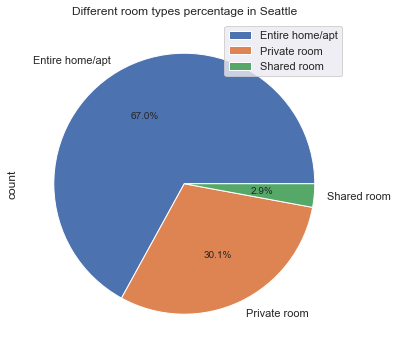

In [328]:
#create pie chart 
room_type.plot(kind='pie', y='count' , labels = room_type['room_type'] ,autopct='%1.1f%%' ,figsize=(6, 6))
plt.title('Different room types percentage in Seattle')



If you are going to Seattle  and you are looking to book some thing on Airbnb you need to know that the most available option is to get an Entire home then the second option is to book private room and the least available option is shared room ,
so if you have a tight budget and you are looking for a shared room book as early as possible and if you are looking for an Entire home you will find plenty of options

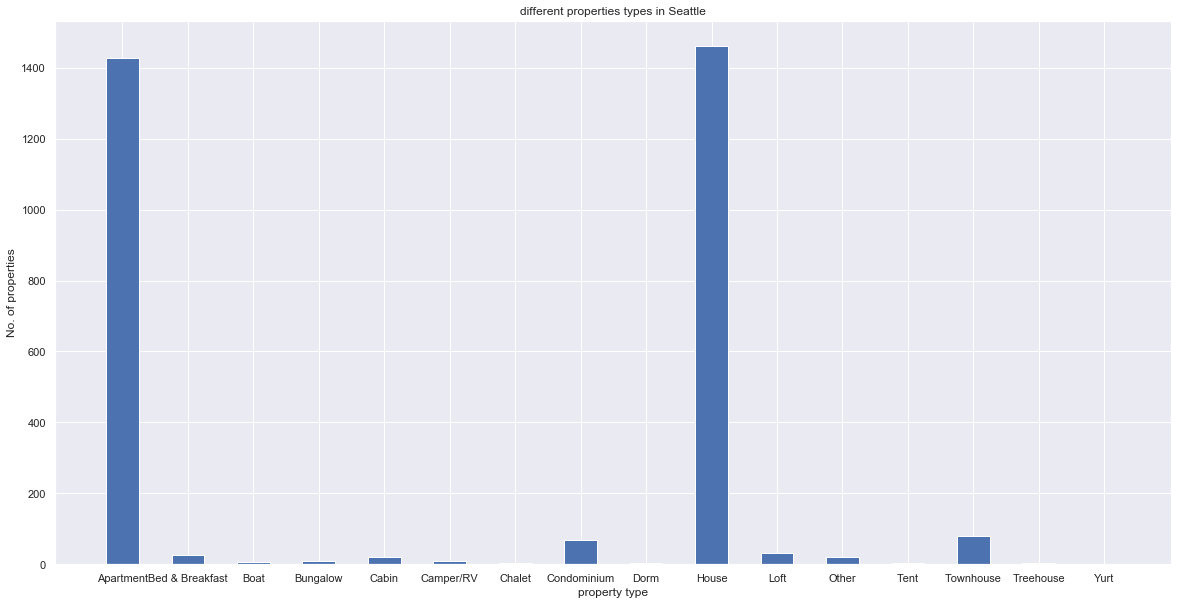

In [330]:
property_type= listings.groupby('property_type').size().to_frame(name = 'count').reset_index() 
property_type.head()
# creating the bar plot
plt.figure(figsize=(20,10)) 
plt.bar(property_type['property_type'],property_type['count'], width = .5)

plt.xlabel("property type")
plt.ylabel("No. of properties")
plt.title("Different properties types in Seattle")
plt.show()

to better know your options this graphs shows a break down by property type and as you can see the most popular type is Apartement ans houses 

In [171]:
# what is the most and least expensive areas in Seattle
neighbourhood = listings.groupby("neighbourhood")["price"].mean().sort_values( ascending=False)
neighbourhood_prices = pd.DataFrame(neighbourhood)
neighbourhood_prices

,price
neighbourhood,
Fairmount Park,370.000000
Industrial District,245.000000
Portage Bay,241.428571
Westlake,197.000000
Alki,196.652174
Montlake,195.947368
Magnolia,176.000000
Pike Place Market,175.512821
Windermere,174.700000


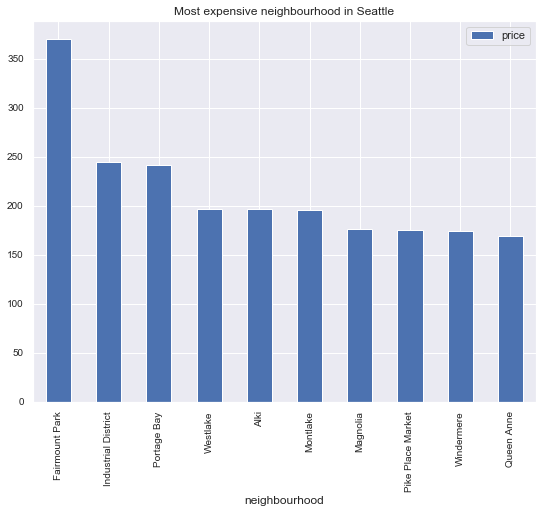

In [448]:
# most expensive 10 areas 
neighbourhood_prices.head(10).plot.bar(figsize=(9,7),fontsize = 10, title ='Most expensive neighbourhood in Seattle')

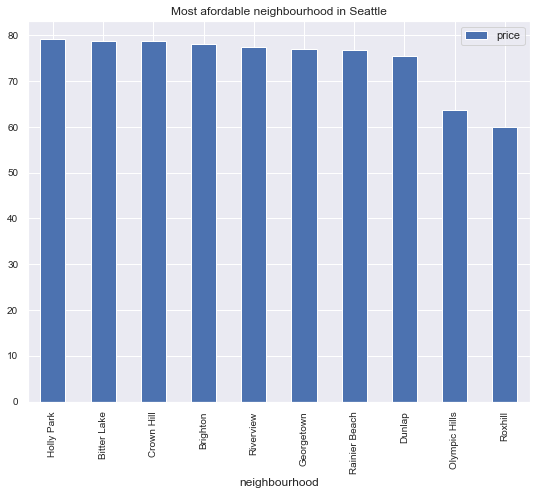

In [449]:
# most expensive 10 areas 
neighbourhood_prices.tail(10).plot.bar(figsize=(9,7),fontsize = 10, title ='Most afordable neighbourhood in Seattle')

this break down shows the most and least expensive neighbourhood in Seattle

Text(0, 0.5, 'Number of reviews')

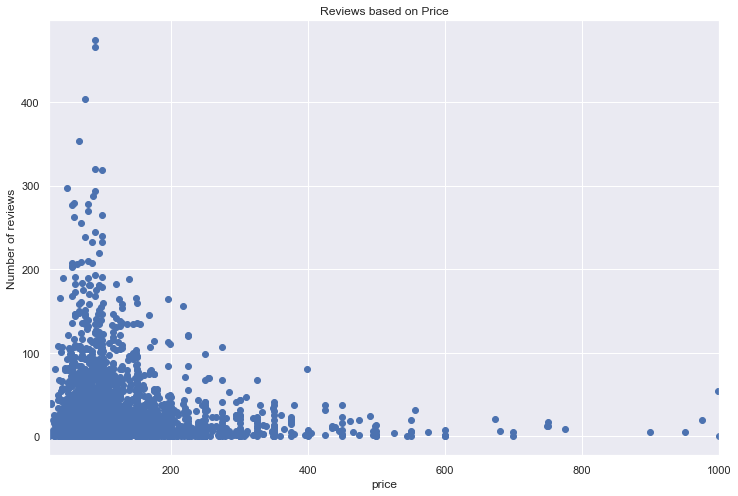

In [334]:
#does the most expensive houses has the highest number of reviews 
price_review = listings[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'N. of Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")

as you see not necessary the most expensive properties have the highest review , 
so if you are looking for afordable property you will find plenty of reviews to help

Text(0, 0.5, 'review_scores_cleanliness')

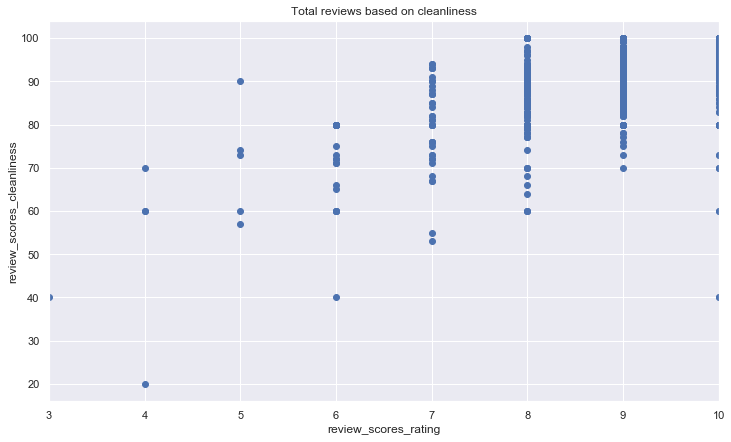

In [427]:
#Does Cleanliness impacts the over all score rating
price_review = listings[[ 'review_scores_cleanliness','review_scores_rating']].sort_values(by = 'review_scores_rating')

price_review.plot(x = 'review_scores_cleanliness', 
                  y = 'review_scores_rating', 
                  style = 'o',
                  figsize =(12,7),
                  legend = False,
                  title = 'Total reviews based on cleanliness')

plt.xlabel("review_scores_rating")
plt.ylabel("review_scores_cleanliness")

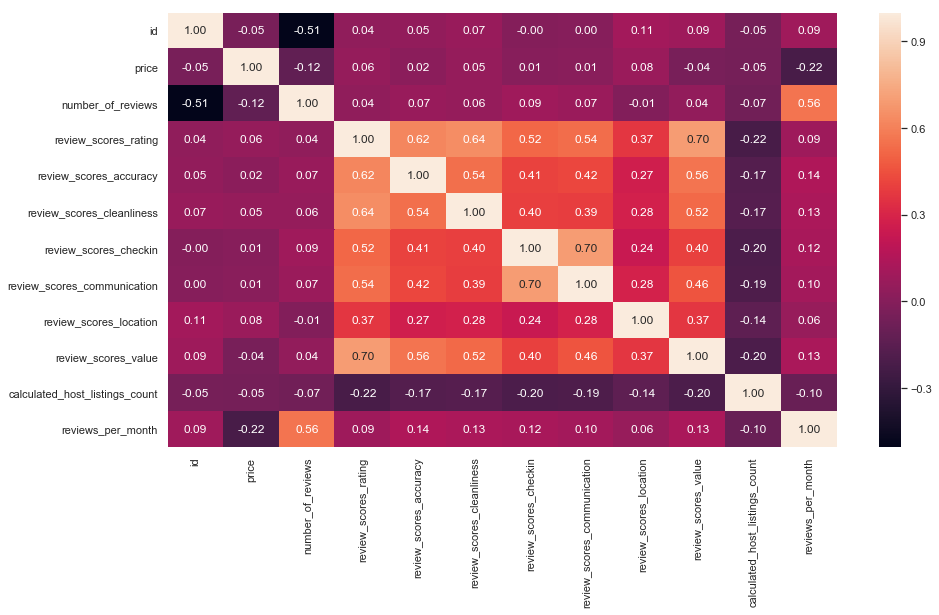

In [117]:
#let's understand the relationship between he data more 
listings_new=listings.drop(["scrape_id" , "host_id","latitude","longitude","accommodates","bathrooms","bedrooms","beds",
                           "availability_30","availability_60","availability_90","availability_365" ,
                            "minimum_nights" ,"maximum_nights","host_listings_count" ,"host_total_listings_count" 
                            ,"guests_included","square_feet" , 
],axis=1)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(listings_new.corr(), annot=True, fmt=".2f" );

In [154]:
#Make sure you don't have empty data in price
listings['price'].isnull().sum()

0

In [391]:
# try to see if the cancellation_policy impacts the price 
listings.groupby([ 'room_type' ,'cancellation_policy']).price.mean().sort_values()

room_type        cancellation_policy
Shared room      strict                  41.348837
                 flexible                46.108108
                 moderate                49.000000
Private room     flexible                71.887906
                 strict                  72.682819
                 moderate                73.087629
Entire home/apt  moderate               135.623978
                 flexible               136.336634
                 strict                 176.457953
Name: price, dtype: float64

It doesn't seam that the cancellation policy impacts the price

In [393]:
listings.groupby([ 'room_type' ,'cancellation_policy']).price.count().to_frame()

price
room_type       cancellation_policy       
Entire home/apt flexible               404
                moderate               734
                strict                 987
Private room    flexible               339
                moderate               388
                strict                 227
Shared room     flexible                37
                moderate                12
                strict                  43

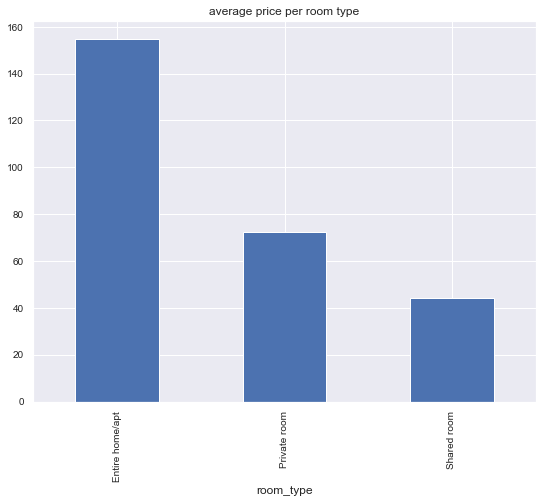

In [451]:
#average price for each room type
listings.groupby('room_type').price.mean().plot.bar(figsize=(9,7),fontsize = 10, title ='average price per room type')

In [419]:
#what is the properties wih the lowest 
Lowest_Price=listings.sort_values("price" ,ascending = True).head(200)

In [430]:
# get the top 10 ratings houses with in the least expensive houses 
df=Lowest_Price.sort_values("review_scores_rating" ,ascending = False).head(10)

In [428]:
#what is the properties wih the lowest 
Highest_Price=listings_Price.sort_values("price" ,ascending = False).head(200)
df1=Highest_Price.head(200).sort_values("review_scores_rating" ,ascending = False).head(10)

Text(0.5, 1.0, 'The least Expensive properties with the heighest ratings ')

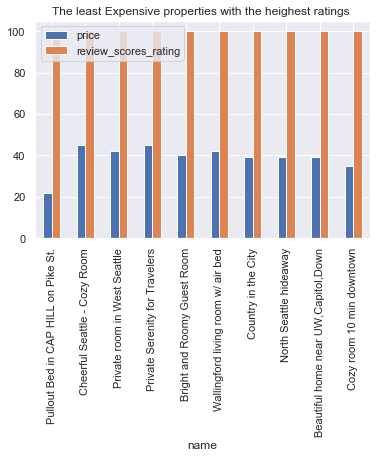

In [433]:
df.plot(x="name", y=["price", "review_scores_rating"], kind="bar")
plt.title ('The least Expensive properties with the heighest ratings ')

from the top 200 least expensive properties in Seattle here is the top properties with the highest overall ratings

Text(0.5, 1.0, 'The most Expensive properties with the heighest ratings ')

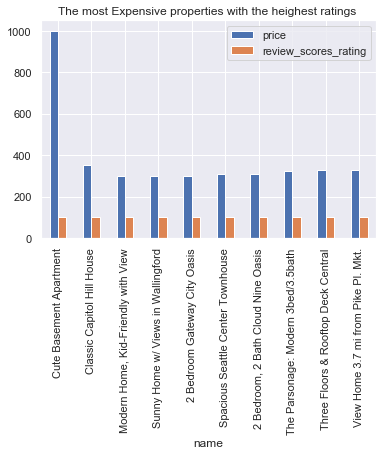

In [432]:
df1.plot(x="name", y=["price", 'review_scores_rating'], kind="bar")
plt.title ('The most Expensive properties with the heighest ratings ')

from the top 200 Most expensive properties in Seattle here is the top tem properties with the highest overall ratings

In [445]:
df1

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_rating
3122,4825073,https://www.airbnb.com/rooms/4825073,20160104002432,2016-01-04,Cute Basement Apartment,2 bedroom fully finished basement apartment wi...,NaN,2 bedroom fully finished basement apartment wi...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,0.08,110.0
2795,4906490,https://www.airbnb.com/rooms/4906490,20160104002432,2016-01-04,Classic Capitol Hill House,Enjoy a warm and comfortable family home in th...,"Off street parking for 3 cars, indoor and outd...","Off street parking for 3 cars, indoor and outd...",none,The north end of Capitol Hill is quiet with so...,...,f,NaN,WASHINGTON,f,moderate,f,f,1,0.20,110.0
468,1027860,https://www.airbnb.com/rooms/1027860,20160104002432,2016-01-04,"Modern Home, Kid-Friendly with View","Our 2 bedroom, 2 bath home has an amazing view...","We are a family of 5, and we rent our home whe...","Our 2 bedroom, 2 bath home has an amazing view...",none,NaN,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.07,110.0
280,314180,https://www.airbnb.com/rooms/314180,20160104002432,2016-01-04,Sunny Home w/ Views in Wallingford,My historic and recently remodeled house is on...,"Enjoy commanding views of downtown, Mt. Rainer...",My historic and recently remodeled house is on...,none,About the 'hood: Short walk to Wallingford an...,...,f,NaN,WASHINGTON,f,strict,f,f,3,0.51,110.0
1288,6315435,https://www.airbnb.com/rooms/6315435,20160104002432,2016-01-04,2 Bedroom Gateway City Oasis,Want to be in the heart of the city without br...,"This condo is brand new to us, and pictures ar...",Want to be in the heart of the city without br...,none,"Step out your door to various restaurants, a l...",...,f,NaN,WASHINGTON,t,strict,t,t,6,0.90,110.0
3197,7678064,https://www.airbnb.com/rooms/7678064,20160104002432,2016-01-04,Spacious Seattle Center Townhouse,"Spacious, modern 3bd/3.5ba townhouse just step...",Spectacular 360 degree views are great...if yo...,"Spacious, modern 3bd/3.5ba townhouse just step...",none,The townhouse is located at the center of the...,...,f,NaN,WASHINGTON,f,strict,f,f,4,1.15,110.0
1086,991961,https://www.airbnb.com/rooms/991961,20160104002432,2016-01-04,"2 Bedroom, 2 Bath Cloud Nine Oasis",This property is available for stays of 29 day...,"Well, really cloud 2209, (as in unit 2209) but...",This property is available for stays of 29 day...,none,NaN,...,f,NaN,WASHINGTON,f,strict,t,t,6,0.21,110.0
933,8508223,https://www.airbnb.com/rooms/8508223,20160104002432,2016-01-04,The Parsonage: Modern 3bed/3.5bath,Note: This listing is only available for booki...,This townhouse has it all: fantastic location ...,Note: This listing is only available for booki...,none,This 3 bedroom home is central to everything C...,...,f,NaN,WASHINGTON,f,strict,f,f,10,0.35,110.0
838,4856986,https://www.airbnb.com/rooms/4856986,20160104002432,2016-01-04,Three Floors & Rooftop Deck Central,"ALL Yours! 3 floors, 3 bedrooms (+ Ikea sofa b...","Our home is simple, airy, and comfortable. Ou...","ALL Yours! 3 floors, 3 bedrooms (+ Ikea sofa b...",none,The Central District is historically one of th...,...,f,NaN,WASHINGTON,f,strict,f,f,4,0.75,110.0
3450,4485424,https://www.airbnb.com/rooms/4485424,20160104002432,2016-01-04,View Home 3.7 mi from Pike Pl. Mkt.,This 3 bedroom home with stunning views of dow...,"Our house is a comfortable, affordable view ho...",This 3 bedroom home with stunning views of dow...,none,"Magnolia is a very nice, quiet neighborhood cl...",...,f,NaN,WASHINGTON,t,strict,f,f,1,2.72,110.0
